### Anamoly
anamoly detects


In [3]:
import pandas as pd
df=pd.read_csv("creditcard_csv.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.shape

(284807, 31)

In [9]:
df['Class'].value_counts()

'0'    284315
'1'       492
Name: Class, dtype: int64

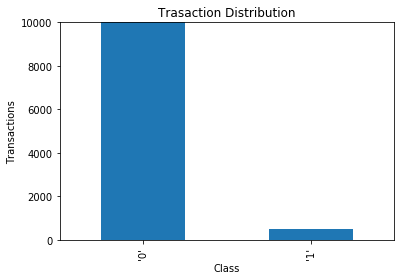

In [17]:
val=df["Class"].value_counts()
val.plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Transactions")
plt.title("Trasaction Distribution")
plt.ylim(0,10000)
plt.show()

In [45]:
df[df["Class"]=="'1'"]=1
df[df["Class"]=="'0'"]=0
df["Class"].value_counts()

C:\Users\user8\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0    284315
1       492
Name: Class, dtype: int64

In [48]:
fraud=df[df["Class"]==1]

In [46]:
valid=df[df["Class"]==0]
print(len(valid))
print(len(fraud))

284315
492


In [47]:
outlier_fraction = len(fraud)/len(valid)
print("outlier_fraction is",outlier_fraction*100)

outlier_fraction is 0.17304750013189596


In [52]:
df_samples=df.sample(frac=0.05,random_state=42)
df_samples.shape

(14240, 31)

In [58]:
x=df_samples[df_samples.columns[:-1]]
x.shape

(14240, 30)

In [91]:
y=df_samples.Class
y.shape

(14240,)

In [68]:
y.value_counts()

0    14219
1       21
Name: Class, dtype: int64

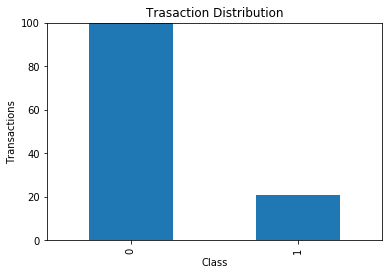

In [71]:
y=df_samples["Class"].value_counts()
y.plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Transactions")
plt.title("Trasaction Distribution")
plt.ylim(0,100)
plt.show()

In [73]:
fraud1=df_samples[df_samples['Class']==1]
valid1=df_samples[df_samples['Class']==0]
outlier_fraction = len(fraud1)/len(valid1)
print("outlier_fraction is",outlier_fraction*100)

outlier_fraction is 0.14768971095013714


In [74]:
df_samples.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
V1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
V2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
V3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
V4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
V5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
V6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
V7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
V8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
V9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


####  

##     
 
 
 
 

## Isolatrion Forest

In [75]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(n_estimators=100)

In [76]:
iso_forest.fit(x)
preds = iso_forest.predict(x)

C:\Users\user8\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\user8\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


In [89]:
preds.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [84]:
preds[preds==1]=0
preds[preds==-1]=1
preds

array([0, 0, 0, ..., 0, 0, 0])

In [93]:
y.value_counts()

0    14219
1       21
Name: Class, dtype: int64

In [94]:
n_error=(preds!=y).sum()
n_error


21